# Simulation of Inventory and Sales

Data
- Items and Inventory in May 2024
- Demand from September 2021 to May 2024

In [5]:
include("src/utils.jl")
include("src/read_data.jl")
include("src/plot_data.jl")
include("src/forecast.jl")

forecast_exponential_smoothing (generic function with 3 methods)

**Read the data sets**
- *items* : dataframe with all items and their inventory positions
- *demand* : dataframe with monthly demands 

In [6]:
items, demand = read_items(), read_demand()
abc_categories = levels(items[!, :ABC])

pretty(items[1:5, :])

HTML{String}("<table>\n  <thead>\n    <tr class = \"header headerLastRow\">\n      <th style = \"text-align: right;\">ITEM</th>\n      <th style = \"text-align: right;\">DESCRIPTION</th>\n      <th style = \"text-align: right;\">DEFAULT_SUPPLYSOURCE</th>\n      <th style = \"text-align: right;\">PRODUCTGROUP</th>\n      <th style = \"text-align: right;\">PROD.CLASS</th>\n      <th style = \"text-align: right;\">BUY_FROMBP</th>\n      <th style = \"text-align: right;\">IMLO</th>\n      <th style = \"text-align: right;\">&lt;12_MONTHS</th>\n      <th style = \"text-align: right;\">12-24_MONTHS</th>\n      <th style = \"text-align: right;\">SIGNAL</th>\n      <th style = \"text-align: right;\">ABC</th>\n      <th style = \"text-align: right;\">EXTRAINF</th>\n      <th style = \"text-align: right;\">WHSE</th>\n      <th style = \"text-align: right;\">INV_ONHAND</th>\n      <th style = \"text-align: right;\">INV_ONORDER</th>\n      <th style = \"text-align: right;\">INVALLOCATED</th>\n      <th style = \"text-align: right;\">SALESCONTRACT</th>\n      <th style = \"text-align: right;\">ALTERNATIVEITEM</th>\n      <th style = \"text-align: right;\">VALUE</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1102-00</td>\n      <td style = \"text-align: right;\">CYLINDER HEAD ASSY 10C3-1</td>\n      <td style = \"text-align: right;\">Purchase</td>\n      <td style = \"text-align: right;\">ZSEN10</td>\n      <td style = \"text-align: right;\">IM10C</td>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">24.00</td>\n      <td style = \"text-align: right;\">TMP</td>\n      <td style = \"text-align: right;\">D</td>\n      <td style = \"text-align: right;\">missing</td>\n      <td style = \"text-align: right;\">SPHQ</td>\n      <td style = \"text-align: right;\">1.00</td>\n      <td style = \"text-align: right;\">10.00</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">missing</td>\n      <td style = \"text-align: right;\">88.04</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1111-10</td>\n      <td style = \"text-align: right;\">HEAD, CYLINDER 1              </td>\n      <td style = \"text-align: right;\">Purchase</td>\n      <td style = \"text-align: right;\">ZSEN10</td>\n      <td style = \"text-align: right;\">LO10C</td>\n      <td style = \"text-align: right;\">01HIYA</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">TMP</td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">missing</td>\n      <td style = \"text-align: right;\">SPHQ</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">missing</td>\n      <td style = \"text-align: right;\">77.63</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1181-00</td>\n      <td style = \"text-align: right;\">GASKET, CYLINDER HE (10C4)    </td>\n      <td style = \"text-align: right;\">Purchase</td>\n      <td style = \"text-align: right;\">ZSEN10</td>\n      <td style = \"text-align: right;\">LO10C</td>\n      <td style = \"text-align: right;\">01HIYA</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">0.00</td>\n      <td style = \"text-align: right;\">SO</td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">missing</td>\n      <td style = 

In [7]:
pretty(demand[1:5, :])

HTML{String}("<table>\n  <thead>\n    <tr class = \"header headerLastRow\">\n      <th style = \"text-align: right;\">ITEM</th>\n      <th style = \"text-align: right;\">MONTH</th>\n      <th style = \"text-align: right;\">DEMAND</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1102-00</td>\n      <td style = \"text-align: right;\">2021-09</td>\n      <td style = \"text-align: right;\">0.00</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1102-00</td>\n      <td style = \"text-align: right;\">2021-10</td>\n      <td style = \"text-align: right;\">0.00</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1102-00</td>\n      <td style = \"text-align: right;\">2021-11</td>\n      <td style = \"text-align: right;\">0.00</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1102-00</td>\n      <td style = \"text-align: right;\">2021-12</td>\n      <td style = \"text-align: right;\">3.00</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">10C-E1102-00</td>\n      <td style = \"text-align: right;\">2022-01</td>\n      <td style = \"text-align: right;\">0.00</td>\n    </tr>\n  </tbody>\n</table>\n")

### Data Quality

In [8]:

di = items[!, :ITEM]
dd = unique(demand[!, :ITEM])
# Items with master data
println("Number of items with master data: ", length(di))
diwd = setdiff(di, dd)
println("-- with demand: ", length(diwd), " ", percentage(length(diwd) / length(di)))
div = items[(!ismissing).(items[!, :VALUE]), :ITEM]
println("-- with value: ", length(div), " ", percentage(length(div) / length(di)))
divd = intersect(div, dd)
println("-- with demand and value: ", length(divd), " ", percentage(length(divd) / length(div)))


# Items with Demand
println()
println("Number of items with demand: ", length(dd))
ddi = intersect(dd, di)
println("-- with master data: ", length(ddi), " ", percentage(length(ddi) / length(dd)))
ddv = intersect(dd, div)
println("-- with value: ", length(ddv), " ", percentage(length(ddv) / length(dd)))
println()

# Remove items without value
subset!(items, :VALUE => ByRow(!ismissing))
@show size(items)


Number of items with master data: 34762
-- with demand: 19630 56.47%
-- with value: 25918 74.56%
-- with demand and value: 13531 52.21%

Number of items with demand: 15365
-- with master data: 15132 98.48%
-- with value: 13531 88.06%

size(items) = (25918, 19)


(25918, 19)

## Analysis of Demand

length(months) = 33
money(last_12m_sales) = "RM 63,398,607"


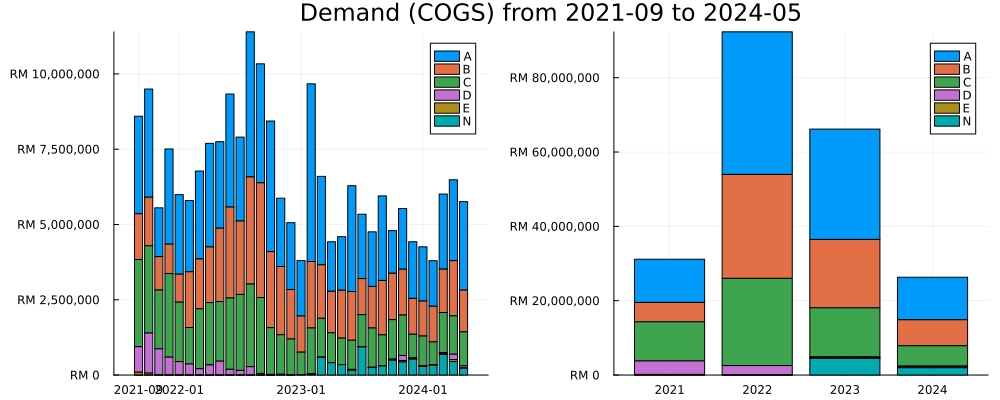

In [9]:
# collect the months
months = unique(demand[!, :MONTH]);
sort!(months);
@show length(months)

# keep only demand with value, add value and abc category to demand
remove_columns!(demand, [:VALUE,:ABC,:DEMAND_VALUE])
demand = innerjoin(demand, select(items, :ITEM, :ABC, :VALUE), on=:ITEM)
select!(demand, All(), [:DEMAND,:VALUE] => ByRow((d, v) -> d * v) => :DEMAND_VALUE)
# aggregate demand value by month and ABC category, and use the index for the month
dmc = combine(groupby(demand, [:MONTH, :ABC]), :DEMAND_VALUE => sum => :DEMAND_VALUE)
transform!(dmc, :MONTH => ByRow(m -> findfirst(==(m), months)) => :MONTH_INDEX)
sort!(dmc, [:MONTH_INDEX, :ABC])
# for x labels on the plot (first and januaries)
xt = [i for (i, m) in enumerate(months) if i == 1 || month(m) == 1];
xtf = ym.([months[i] for i in xt]);

# demand for lat 12 months
last_12m_sales = sum(dmc[dmc.MONTH.>months[end-12], :DEMAND_VALUE])
@show money(last_12m_sales)


#aggregate by years
dyc = transform(dmc, :MONTH => ByRow(year) => :YEAR)
dyc = combine(groupby(dyc, [:YEAR, :ABC]), :DEMAND_VALUE => sum => :DEMAND_VALUE)

# plot the demand value by month and ABC category
plot(
    stackedbar(dmc, :MONTH_INDEX, :DEMAND_VALUE, :ABC, xticks=(xt, xtf), yformatter=money),
    stackedbar(dyc, :YEAR, :DEMAND_VALUE, :ABC, yformatter=money),
    plot_title="Demand (COGS) from $(ym(months[1])) to $(ym(months[end]))", size=(1000, 400))


## Analysis of Inventory

money(total_onhand_inventory_value) = "RM 22,296,797"
money(total_onorder_inventory_value) = "RM 34,077,671"


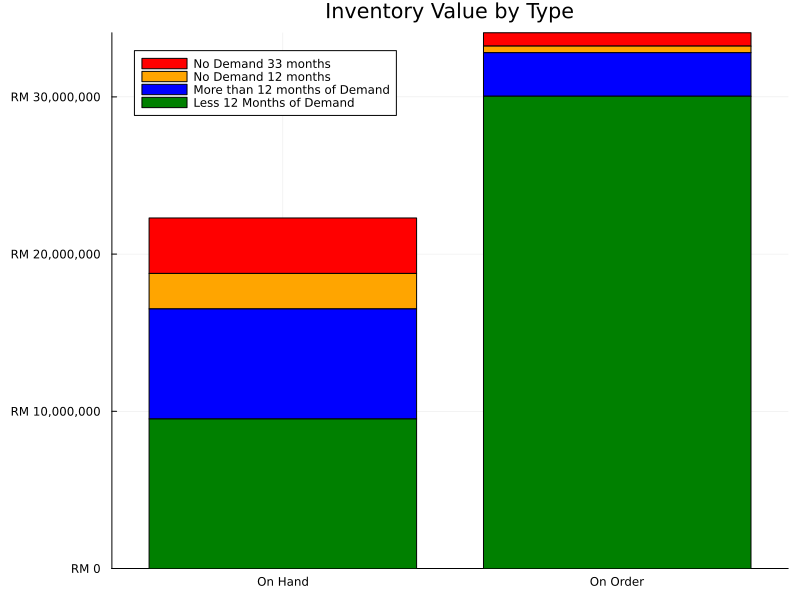

In [10]:
# add value of inventory on hand and on order
transform!(items, [:INV_ONHAND, :VALUE] => ByRow((i, v) -> i * v) => :INV_ONHAND_VALUE, [:INV_ONORDER, :VALUE] => ByRow((i, v) -> i * v) => :INV_ONORDER_VALUE)
total_onhand_inventory_value = sum(items[!, :INV_ONHAND_VALUE])
total_onorder_inventory_value = sum(items[!, :INV_ONORDER_VALUE])
@show money(total_onhand_inventory_value)
@show money(total_onorder_inventory_value)
# add total and last 12 demand
sort!(demand, [:ITEM, :MONTH])
remove_columns!(items, [:TOTAL_DEMAND, :LAST_12M_DEMAND])
leftjoin!(items, combine(groupby(demand, :ITEM), :DEMAND => (x -> (TOTAL_DEMAND=sum(x), LAST_12M_DEMAND=sum(x[end-11:end]))) => AsTable), on=:ITEM)
transform!(items, :TOTAL_DEMAND => (x -> coalesce.(x, 0)) => :TOTAL_DEMAND, :LAST_12M_DEMAND => (x -> coalesce.(x, 0)) => :LAST_12M_DEMAND)
transform!(items, [:LAST_12M_DEMAND, :VALUE] => ByRow((i, v) -> i * v) => :LAST_12M_SALES)
# Inventory in Months of Supply, -1 is used when no demand
transform!(items, [:INV_ONHAND, :LAST_12M_DEMAND] => ByRow((i, d) -> d > 0 ? 12i / d : -1) => :OH_MONTHS_OF_SUPPLY)
transform!(items, [:INV_ONORDER, :LAST_12M_DEMAND] => ByRow((i, d) -> d > 0 ? 12i / d : -1) => :OO_MONTHS_OF_SUPPLY)

# copy to analyze inventory
i1 = select(items, :ITEM, :ABC, :OH_MONTHS_OF_SUPPLY, :INV_ONHAND_VALUE, :INV_ONORDER_VALUE, :LAST_12M_SALES, :TOTAL_DEMAND, :LAST_12M_DEMAND)
# additional rows for the inventory older than 12 months, keep only the part over 12 months
i2 = subset(i1, :OH_MONTHS_OF_SUPPLY => ByRow(>(12)))
transform!(i2, [:OH_MONTHS_OF_SUPPLY, :INV_ONHAND_VALUE, :LAST_12M_SALES] => ByRow((m, v, l) -> (m - 12, v - l)) => [:OH_MONTHS_OF_SUPPLY, :INV_ONHAND_VALUE])
transform!(i1,
    [:OH_MONTHS_OF_SUPPLY, :INV_ONHAND_VALUE, :LAST_12M_SALES, :INV_ONORDER_VALUE] =>
        ByRow((m, v, l, o) -> m > 12 ? (12, l, 0) : (m, v, o)) =>
            [:OH_MONTHS_OF_SUPPLY, :INV_ONHAND_VALUE, :INV_ONORDER_VALUE])
# combine the two parts
append!(i1, i2)

# # # mark items with demand status
transform!(i1,
    [:OH_MONTHS_OF_SUPPLY, :TOTAL_DEMAND, :LAST_12M_DEMAND] => ByRow(
        (m, td, l12) -> (td == 0) ? "No Demand 33 months" :
                        (l12 == 0) ? "No Demand 12 months" :
                        (m > 12) ? "More than 12 months of Demand" : "Less 12 Months of Demand") => :DEMAND_STATUS)
i1[!, :DEMAND_STATUS] = categorical(i1[!, :DEMAND_STATUS], ordered=true)
levels!(i1[!, :DEMAND_STATUS], ["No Demand 33 months", "No Demand 12 months", "More than 12 months of Demand", "Less 12 Months of Demand"])


# aggregate inventories by demand flag and category
difc = combine(groupby(i1, [:ABC, :DEMAND_STATUS]), :INV_ONHAND_VALUE => sum => :INV_ONHAND_VALUE, :INV_ONORDER_VALUE => sum => :INV_ONORDER_VALUE)
# aggregate all inventory by demand flag
dif = combine(groupby(difc, :DEMAND_STATUS), :INV_ONHAND_VALUE => sum => :INV_ONHAND_VALUE, :INV_ONORDER_VALUE => sum => :INV_ONORDER_VALUE, :DEMAND_STATUS)
dif = stack(dif, [:INV_ONHAND_VALUE, :INV_ONORDER_VALUE], variable_name=:INVENTORY, value_name=:VALUE)
transform!(dif, :INVENTORY => ByRow(x -> x == "INV_ONHAND_VALUE" ? "On Hand" : "On Order") => :TYPE)

stackedbar(dif, :TYPE, :VALUE, :DEMAND_STATUS, yformatter=money, color=[:red :orange :blue :green], title="Inventory Value by Type", size=(800, 600))


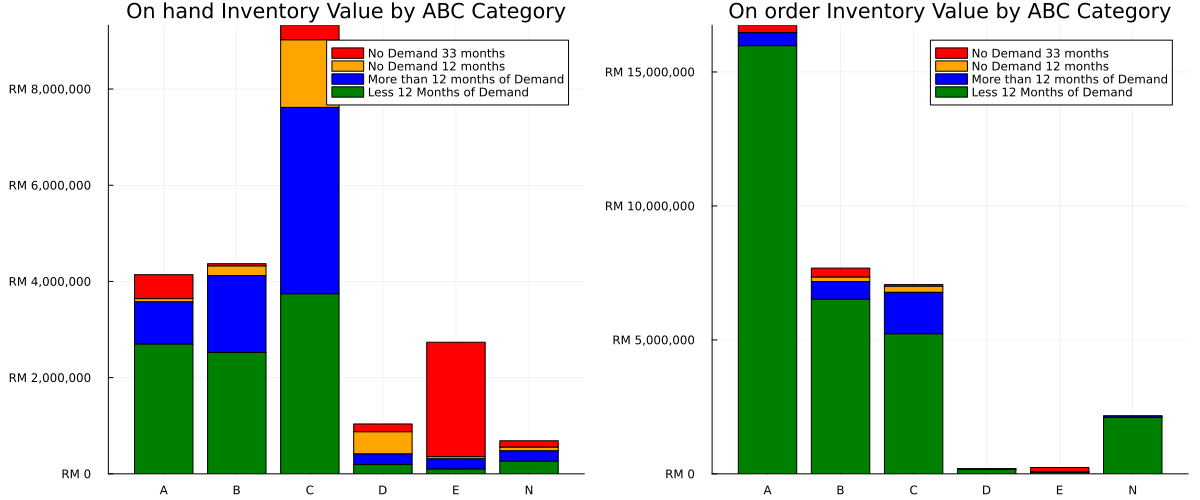

In [11]:
# plot inventory by categories
plot(
    stackedbar(difc, :ABC, :INV_ONHAND_VALUE, :DEMAND_STATUS, yformatter=money, color=[:red :orange :blue :green], title="On hand Inventory Value by ABC Category"),
    stackedbar(difc, :ABC, :INV_ONORDER_VALUE, :DEMAND_STATUS, yformatter=money, color=[:red :orange :blue :green], title="On order Inventory Value by ABC Category"),
    size=(1200, 500))

# Top 20 items with no demand since 33 months

In [12]:
# Examples of items with no demand since 33 months, sorted on hand
old = items[items[!, :TOTAL_DEMAND].==0, [:ITEM, :DESCRIPTION, :ABC, :INV_ONHAND_VALUE, :INV_ONORDER_VALUE]]
sort!(old, [:INV_ONHAND_VALUE, :INV_ONORDER_VALUE], rev=true)
pretty(old[1:20, :], rename_cols=[:ITEM => "Item", :DESCRIPTION => "Description", :ABC => "ABC", :INV_ONHAND_VALUE => "On Hand", :INV_ONORDER_VALUE => "On Order"])

HTML{String}("<table>\n  <thead>\n    <tr class = \"header headerLastRow\">\n      <th style = \"text-align: right;\">Item</th>\n      <th style = \"text-align: right;\">Description</th>\n      <th style = \"text-align: right;\">ABC</th>\n      <th style = \"text-align: right;\">On Hand</th>\n      <th style = \"text-align: right;\">On Order</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td style = \"text-align: right;\">93310-422X4</td>\n      <td style = \"text-align: right;\">BEARING PK 22X28X15.8X2</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">RM 268,108</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">2PV-WE13E-00</td>\n      <td style = \"text-align: right;\">CYLINDER &amp; PISTON RING SET</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">RM 90,238</td>\n      <td style = \"text-align: right;\">RM 215,145</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">B6H-E1651-00</td>\n      <td style = \"text-align: right;\">ROD, CONNECTING               </td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 71,144</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">5VD-E1310-20</td>\n      <td style = \"text-align: right;\">CYLINDER</td>\n      <td style = \"text-align: right;\">C</td>\n      <td style = \"text-align: right;\">RM 60,855</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">5LW-11681-00</td>\n      <td style = \"text-align: right;\">PIN, CRANK 1                  </td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 46,213</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">3XL-F7451-00</td>\n      <td style = \"text-align: right;\">footrest 3</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">RM 38,749</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">1S7-E1681-20</td>\n      <td style = \"text-align: right;\">PIN, CRANK 1 (1S7-E1681-03)   </td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">RM 37,182</td>\n      <td style = \"text-align: right;\">RM 1,760</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">BBW-8591A-20</td>\n      <td style = \"text-align: right;\">ENGINE CONTROL UNIT ASSY</td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 28,467</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">3XL-F7461-00</td>\n      <td style = \"text-align: right;\">footrest 4</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">RM 27,601</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">BBW-82590-00</td>\n      <td style = \"text-align: right;\">WIRE HARNESS ASSY</td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 26,803</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">BBW-22210-00</td>\n      <td style = \"text-align: right;\">SHOCK ABSORBER ASSY, REAR     </td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 25,997</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">1WD-E3907-10</td>\n      <td style = \"text-align: right;\">fuel pump comp.</td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-

In [13]:
# Examples of items with no demand since 33 months, sorted on order
sort!(old, [:INV_ONORDER_VALUE, :INV_ONHAND_VALUE], rev=true)
select!(old, Not([:INV_ONORDER_VALUE, :INV_ONHAND_VALUE]), :INV_ONORDER_VALUE, :INV_ONHAND_VALUE)
pretty(old[1:20, :], rename_cols=[:ITEM => "Item", :DESCRIPTION => "Description", :ABC => "ABC", :INV_ONHAND_VALUE => "On Hand", :INV_ONORDER_VALUE => "On Order"])

HTML{String}("<table>\n  <thead>\n    <tr class = \"header headerLastRow\">\n      <th style = \"text-align: right;\">Item</th>\n      <th style = \"text-align: right;\">Description</th>\n      <th style = \"text-align: right;\">ABC</th>\n      <th style = \"text-align: right;\">On Order</th>\n      <th style = \"text-align: right;\">On Hand</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td style = \"text-align: right;\">2PV-WE13E-00</td>\n      <td style = \"text-align: right;\">CYLINDER &amp; PISTON RING SET</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">RM 215,145</td>\n      <td style = \"text-align: right;\">RM 90,238</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">2DP-WE13E-00</td>\n      <td style = \"text-align: right;\">CYLINDER &amp; PISTON RING SET</td>\n      <td style = \"text-align: right;\">B</td>\n      <td style = \"text-align: right;\">RM 215,050</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">55D-H2100-00</td>\n      <td style = \"text-align: right;\">BTRY. ASSY. 2 (PTZ5S)</td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 105,000</td>\n      <td style = \"text-align: right;\">RM 0</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">33S-E1631-03-B0</td>\n      <td style = \"text-align: right;\">PISTON STD 44P3/2/1,2BR2/1    </td>\n      <td style = \"text-align: right;\">B</td>\n      <td style = \"text-align: right;\">RM 53,435</td>\n      <td style = \"text-align: right;\">RM 7,259</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">55K-27412-00</td>\n      <td style = \"text-align: right;\">bracket 1</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">RM 50,400</td>\n      <td style = \"text-align: right;\">RM 66</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">5P0-E1631-11</td>\n      <td style = \"text-align: right;\">PISTON (STD)(5P0-E1631-10)</td>\n      <td style = \"text-align: right;\">B</td>\n      <td style = \"text-align: right;\">RM 34,639</td>\n      <td style = \"text-align: right;\">RM 6,700</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">93812-14822</td>\n      <td style = \"text-align: right;\">SPROCKET, DRIVE (93822-14824) </td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 16,722</td>\n      <td style = \"text-align: right;\">RM 18,664</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">1WD-E3907-10</td>\n      <td style = \"text-align: right;\">fuel pump comp.</td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 13,204</td>\n      <td style = \"text-align: right;\">RM 25,982</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">B1X-12121-10</td>\n      <td style = \"text-align: right;\">VALVE, EXHAUST                </td>\n      <td style = \"text-align: right;\">E</td>\n      <td style = \"text-align: right;\">RM 12,262</td>\n      <td style = \"text-align: right;\">RM 230</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">93306-253Y9</td>\n      <td style = \"text-align: right;\">BEARING (1VB)</td>\n      <td style = \"text-align: right;\">C</td>\n      <td style = \"text-align: right;\">RM 11,828</td>\n      <td style = \"text-align: right;\">RM 2,066</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">5MX-E1631-00</td>\n      <td style = \"text-align: right;\">PISTON (STD)</td>\n      <td style = \"text-align: right;\">C</td>\n      <td style = \"text-align: right;\">RM 11,278</td>\n      <td style = \"text-align: right;\">RM 555</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">93306-253Y3</td>\n      <td style = \"text-align: right;\">BEARING</td>\n      <td style = \"text-align: right;\">C</td>\n    

In [14]:
# Examples of items with on hand + on order >12 months
old = select(items, :ITEM, :DESCRIPTION, :ABC, :OH_MONTHS_OF_SUPPLY, :OO_MONTHS_OF_SUPPLY,
    [:OH_MONTHS_OF_SUPPLY, :OO_MONTHS_OF_SUPPLY] => ByRow((oh, oo) -> oh + oo) => :TOTAL_MONTHS_OF_SUPPLY,
    :INV_ONHAND_VALUE, :INV_ONORDER_VALUE,
    [:INV_ONHAND_VALUE, :INV_ONORDER_VALUE] => ByRow((h, o) -> h + o) => :TOTAL_INVENTORY_VALUE)
subset!(old, :OH_MONTHS_OF_SUPPLY => ByRow(>(12)), :INV_ONORDER_VALUE => ByRow(>(0)))
sort!(old, [:INV_ONORDER_VALUE], rev=true)
pretty(old[1:20, :], rename_cols=[:ITEM => "Item", :DESCRIPTION => "Description", :ABC => "ABC", :OH_MONTHS_OF_SUPPLY => "On Hand Months", :OO_MONTHS_OF_SUPPLY => "On Order Months", :TOTAL_MONTHS_OF_SUPPLY => "Total Months", :INV_ONHAND_VALUE => "On Hand", :INV_ONORDER_VALUE => "On Order", :TOTAL_INVENTORY_VALUE => "Total Value"])

HTML{String}("<table>\n  <thead>\n    <tr class = \"header headerLastRow\">\n      <th style = \"text-align: right;\">Item</th>\n      <th style = \"text-align: right;\">Description</th>\n      <th style = \"text-align: right;\">ABC</th>\n      <th style = \"text-align: right;\">On Hand Months</th>\n      <th style = \"text-align: right;\">On Order Months</th>\n      <th style = \"text-align: right;\">Total Months</th>\n      <th style = \"text-align: right;\">On Hand</th>\n      <th style = \"text-align: right;\">On Order</th>\n      <th style = \"text-align: right;\">Total Value</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td style = \"text-align: right;\">1PA-WE13E-00</td>\n      <td style = \"text-align: right;\">CYLINDER &amp; PISTON RING SET</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">19.99</td>\n      <td style = \"text-align: right;\">242.62</td>\n      <td style = \"text-align: right;\">262.61</td>\n      <td style = \"text-align: right;\">RM 105,824</td>\n      <td style = \"text-align: right;\">RM 1,284,247</td>\n      <td style = \"text-align: right;\">RM 1,390,072</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">5BU-E6150-00</td>\n      <td style = \"text-align: right;\">PRIMARY DRIVEN GEAR ASSY</td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">22.17</td>\n      <td style = \"text-align: right;\">42.60</td>\n      <td style = \"text-align: right;\">64.77</td>\n      <td style = \"text-align: right;\">RM 141,637</td>\n      <td style = \"text-align: right;\">RM 272,157</td>\n      <td style = \"text-align: right;\">RM 413,794</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">BBP-E6620-00</td>\n      <td style = \"text-align: right;\">CLUTCH CARRIER ASSY</td>\n      <td style = \"text-align: right;\">C</td>\n      <td style = \"text-align: right;\">14.57</td>\n      <td style = \"text-align: right;\">1129.14</td>\n      <td style = \"text-align: right;\">1143.71</td>\n      <td style = \"text-align: right;\">RM 3,421</td>\n      <td style = \"text-align: right;\">RM 265,061</td>\n      <td style = \"text-align: right;\">RM 268,481</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">1MA-24500-11</td>\n      <td style = \"text-align: right;\">FUEL COCK ASSY 1 (1MA-24500-10</td>\n      <td style = \"text-align: right;\">B</td>\n      <td style = \"text-align: right;\">19.99</td>\n      <td style = \"text-align: right;\">27.08</td>\n      <td style = \"text-align: right;\">47.07</td>\n      <td style = \"text-align: right;\">RM 151,952</td>\n      <td style = \"text-align: right;\">RM 205,794</td>\n      <td style = \"text-align: right;\">RM 357,746</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">94568-D6122</td>\n      <td style = \"text-align: right;\">CHAIN</td>\n      <td style = \"text-align: right;\">C</td>\n      <td style = \"text-align: right;\">49.50</td>\n      <td style = \"text-align: right;\">7965.00</td>\n      <td style = \"text-align: right;\">8014.50</td>\n      <td style = \"text-align: right;\">RM 1,234</td>\n      <td style = \"text-align: right;\">RM 198,594</td>\n      <td style = \"text-align: right;\">RM 199,828</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">2PH-E1311-10</td>\n      <td style = \"text-align: right;\">BODY,CYLINDER 1 B921          </td>\n      <td style = \"text-align: right;\">A</td>\n      <td style = \"text-align: right;\">476.00</td>\n      <td style = \"text-align: right;\">14600.00</td>\n      <td style = \"text-align: right;\">15076.00</td>\n      <td style = \"text-align: right;\">RM 5,950</td>\n      <td style = \"text-align: right;\">RM 182,500</td>\n      <td style = \"text-align: right;\">RM 188,450</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">BBP-E7670-00</td>\n      <td style = \"text-align: right;\">SECONDARY SLIDINGSHEAVE</td>\n      <td sty

## Analysis in months of Sales
Based on the demand of the last 12 months

global_average = 4.2203066651491135
with_demand_average = 3.55252654490471
with_12m_demand_average = 3.125654552296576


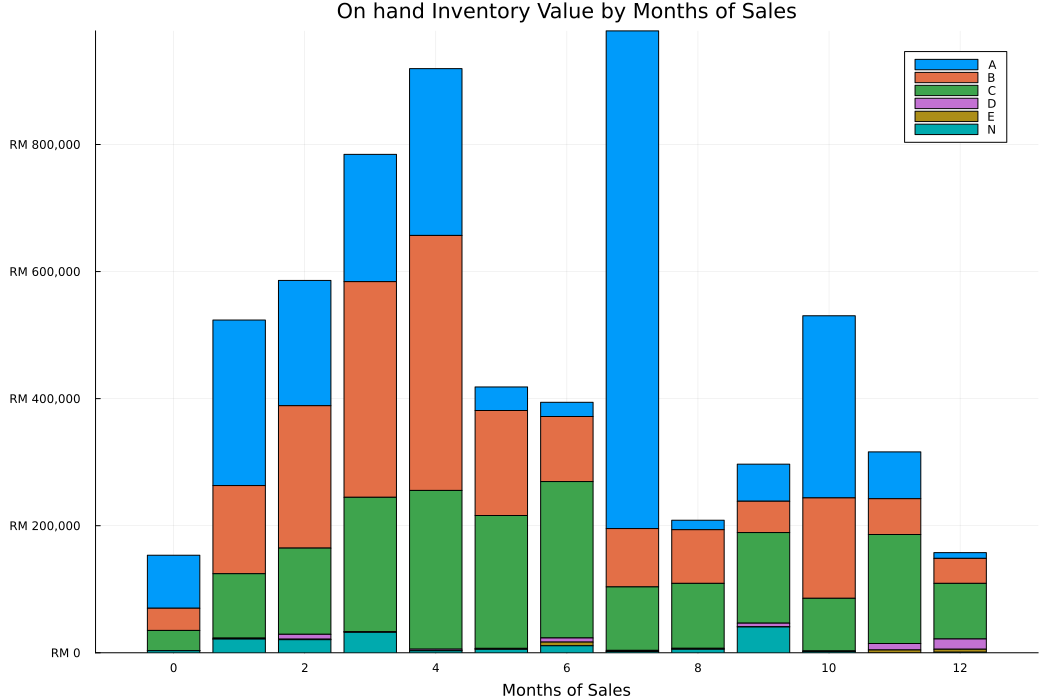

In [15]:
global_average = 12 * sum(items[!, :INV_ONHAND_VALUE]) / last_12m_sales
@show global_average

with_demand_average = 12 * sum(items[items[!, :TOTAL_DEMAND].>0, :INV_ONHAND_VALUE]) / last_12m_sales
@show with_demand_average

with_12m_demand_average = 12 * sum(items[items[!, :LAST_12M_DEMAND].>0, :INV_ONHAND_VALUE]) / last_12m_sales
@show with_12m_demand_average


# collect for plotting inventory value from by months of supply
mlimit = 12
find_bucket(m) = m <= -1 ? -1 : m > mlimit ? -1 : round(Int, m)
dim = select(items, :OH_MONTHS_OF_SUPPLY => ByRow(find_bucket) => :NB_MONTHS, :ABC, :INV_ONHAND_VALUE)
subset!(dim, :NB_MONTHS => ByRow(>=(0))) # keepd with demand
dim = combine(groupby(dim, [:NB_MONTHS, :ABC]), :INV_ONHAND_VALUE => sum => :INV_ONHAND_VALUE)

stackedbar(dim, :NB_MONTHS, :INV_ONHAND_VALUE, :ABC, title="On hand Inventory Value by Months of Sales", xlabel="Months of Sales", yformatter=money, size=(1050, 700))


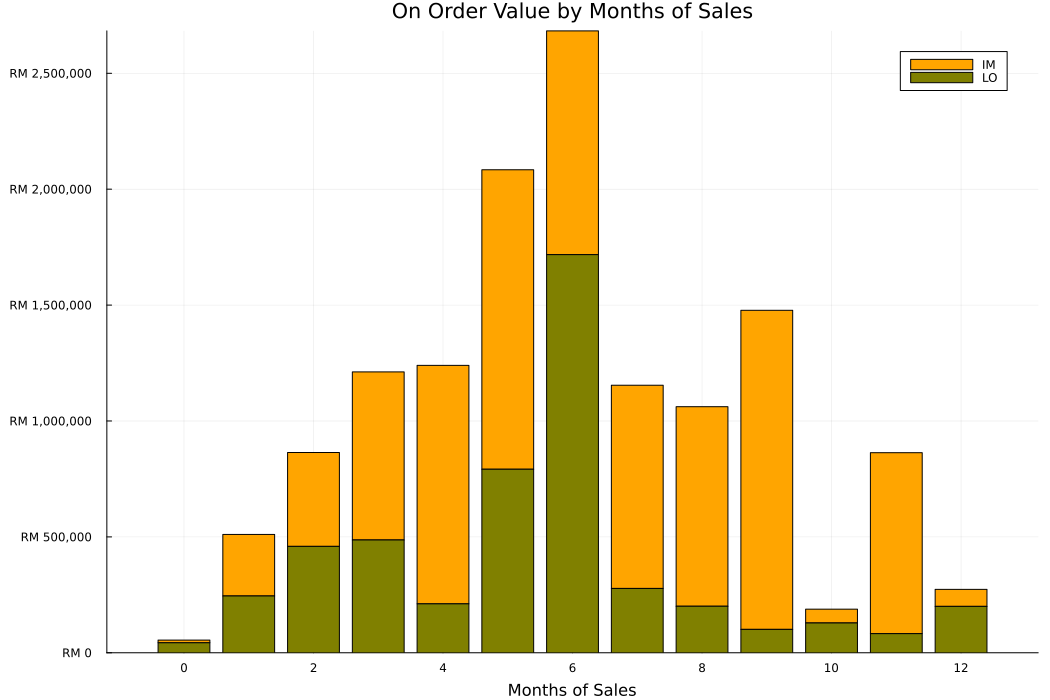

In [16]:

# collect for plotting on order value from by months of supply
mlimit = 12
find_bucket(m) = m <= -1 || m > mlimit ? -1 : round(Int, m)
dim = select(items, :ITEM, :DESCRIPTION, :OO_MONTHS_OF_SUPPLY => ByRow(find_bucket) => :NB_MONTHS, :ABC, :INV_ONORDER_VALUE, :IMLO, :BUY_FROMBP)
subset!(dim, :NB_MONTHS => ByRow(>=(0))) # keepd with demand
dimc = combine(groupby(dim, [:NB_MONTHS, :IMLO]), :INV_ONORDER_VALUE => sum => :INV_ONORDER_VALUE)


stackedbar(dimc, :NB_MONTHS, :INV_ONORDER_VALUE, :IMLO, title="On Order Value by Months of Sales", xlabel="Months of Sales", color=[:orange :olive], yformatter=money, size=(1050, 700))


In [17]:
d = subset(dim, :IMLO => ByRow(==("LO")))#:NB_MONTHS=>ByRow(>=(7)))	
select!(d, Not(:ABC))
sort!(d, [:INV_ONORDER_VALUE], rev=true)
hl_p = HtmlHighlighter(
    (data, i, j) -> (j == 3) && data[i, 3] >= 6,
    HtmlDecoration(color="red", font_weight="bold")
)
pretty(d[1:20, :], rename_cols=[:ITEM => "Item", :DESCRIPTION => "Description", :NB_MONTHS => "Months of Supply", :INV_ONORDER_VALUE => "On Order"], highlighters=hl_p)

HTML{String}("<table>\n  <thead>\n    <tr class = \"header headerLastRow\">\n      <th style = \"text-align: right;\">Item</th>\n      <th style = \"text-align: right;\">Description</th>\n      <th style = \"text-align: right;\">Months of Supply</th>\n      <th style = \"text-align: right;\">On Order</th>\n      <th style = \"text-align: right;\">IMLO</th>\n      <th style = \"text-align: right;\">BUY_FROMBP</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td style = \"text-align: right;\">5YP-E6310-01</td>\n      <td style = \"text-align: right;\">CLUTCH HOUSING ASSY</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">6.00</td>\n      <td style = \"text-align: right;\">RM 1,216,292</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01HIYA</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">3XL-E4711-00</td>\n      <td style = \"text-align: right;\">MUFFLER</td>\n      <td style = \"text-align: right;\">5.00</td>\n      <td style = \"text-align: right;\">RM 245,394</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01YOAU</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">5BU-E1111-00</td>\n      <td style = \"text-align: right;\">HEAD, CYLINDER 1              </td>\n      <td style = \"text-align: right;\">3.00</td>\n      <td style = \"text-align: right;\">RM 168,521</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01HIYA</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">1S8-H2590-02</td>\n      <td style = \"text-align: right;\">wire harness assy</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">12.00</td>\n      <td style = \"text-align: right;\">RM 148,628</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01HUHS</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">93900-00817</td>\n      <td style = \"text-align: right;\">valve rim</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">6.00</td>\n      <td style = \"text-align: right;\">RM 111,112</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01MOCO</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">BDK-H3301-00</td>\n      <td style = \"text-align: right;\">FR. FLASHER LIGHT ASSY.</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">6.00</td>\n      <td style = \"text-align: right;\">RM 101,566</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01HUHS</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">B17-E1400-00</td>\n      <td style = \"text-align: right;\">CRANK ASSY. B171</td>\n      <td style = \"text-align: right;\">5.00</td>\n      <td style = \"text-align: right;\">RM 99,355</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01HIYA</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">B17-H2590-30</td>\n      <td style = \"text-align: right;\">WIRE HARNESS ASSY.</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">6.00</td>\n      <td style = \"text-align: right;\">RM 96,845</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01HUHS</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">B17-E1102-01</td>\n      <td style = \"text-align: right;\">CYLINDER HEAD ASSY</td>\n      <td style = \"text-align: right;\">5.00</td>\n      <td style = \"text-align: right;\">RM 54,400</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">01HIYA</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">1S8-F7411-00</td>\n      <td style = \"text-align: right;\">footrest</td>\n      <td style = \"text

In [18]:
# by supplier
dimc = combine(groupby(dim, [:BUY_FROMBP, :IMLO, :NB_MONTHS]), :INV_ONORDER_VALUE => sum => :INV_ONORDER_VALUE)
sort!(dimc, [:INV_ONORDER_VALUE, :NB_MONTHS], rev=true)
pretty(dimc[1:20, :], rename_cols=[:BUY_FROMBP => "Supplier", :NB_MONTHS => "Months of Supply", :INV_ONORDER_VALUE => "On Order"], highlighters=hl_p)

HTML{String}("<table>\n  <thead>\n    <tr class = \"header headerLastRow\">\n      <th style = \"text-align: right;\">Supplier</th>\n      <th style = \"text-align: right;\">IMLO</th>\n      <th style = \"text-align: right;\">Months of Supply</th>\n      <th style = \"text-align: right;\">On Order</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td style = \"text-align: right;\">01HIYA</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">6.00</td>\n      <td style = \"text-align: right;\">RM 1,249,454</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">9.00</td>\n      <td style = \"text-align: right;\">RM 1,237,916</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"text-align: right;\">5.00</td>\n      <td style = \"text-align: right;\">RM 1,046,548</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">6.00</td>\n      <td style = \"text-align: right;\">RM 906,837</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"text-align: right;\">4.00</td>\n      <td style = \"text-align: right;\">RM 812,428</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">8.00</td>\n      <td style = \"text-align: right;\">RM 667,363</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"text-align: right;\">3.00</td>\n      <td style = \"text-align: right;\">RM 593,183</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YDSP</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">7.00</td>\n      <td style = \"text-align: right;\">RM 466,536</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YDSP</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">11.00</td>\n      <td style = \"text-align: right;\">RM 434,207</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"text-align: right;\">2.00</td>\n      <td style = \"text-align: right;\">RM 329,664</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YOAU</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"text-align: right;\">5.00</td>\n      <td style = \"text-align: right;\">RM 329,546</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">7.00</td>\n      <td style = \"text-align: right;\">RM 312,722</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01YAIA</td>\n      <td style = \"text-align: right;\">IM</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">11.00</td>\n      <td style = \"text-align: right;\">RM 265,789</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01HUHS</td>\n      <td style = \"text-align: right;\">LO</td>\n      <td style = \"color: red; font-weight: bold; text-align: right;\">6.00</td>\n      <td style = \"text-align: right;\">RM 198,411</td>\n    </tr>\n    <tr>\n      <td style = \"text-align: right;\">01HIYA</td>\n      <td style = \"

## Analysis of Service

money(total_12M_sales) = "RM 63,398,607"


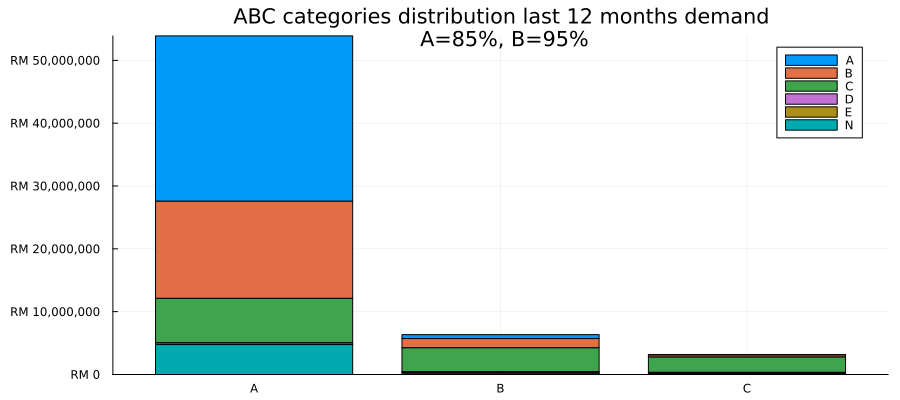

In [19]:


# recompute ABC categories
total_12M_sales = dot(items[!, :LAST_12M_DEMAND], items[!, :VALUE])
@show money(total_12M_sales)
pa = 0.85;
pb = 0.95;
nabc = subset(items, :LAST_12M_DEMAND => ByRow(>(0))) |>
       df -> select(df, :ITEM, :ABC, :VALUE, :LAST_12M_DEMAND, [:VALUE, :LAST_12M_DEMAND] => ByRow(*) => :LAST_12M_SALES) |>
             df -> sort!(df, :LAST_12M_SALES, rev=true) |>
                   df -> transform(df, :LAST_12M_SALES => cumsum => :CUMULATIVE_SALES) |>
                         df -> transform(df, :CUMULATIVE_SALES => ByRow(x -> x / total_12M_sales) => :CUMULATIVE_PERCENT) |>
                               df -> transform(df, :CUMULATIVE_PERCENT => ByRow(x -> x < pa ? "A" : x < pb ? "B" : "C") => :NEW_ABC)

nabcg = combine(groupby(nabc, [:NEW_ABC, :ABC]), :LAST_12M_SALES => sum => :LAST_12M_SALES)


# plot the distribution of ABC categories
stackedbar(nabcg, :NEW_ABC, :LAST_12M_SALES, :ABC, yformatter=money, title="ABC categories distribution last 12 months demand\n A=$(percentage(pa,0)), B=$(percentage(pb,0))", size=(900, 400))



### Back to Demand

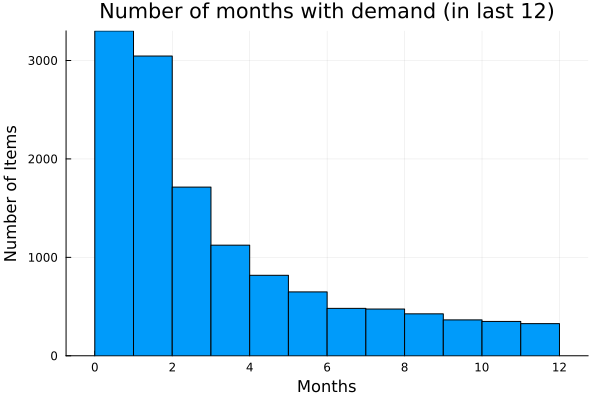

In [20]:
# items demand info for last 12 months
ditems = combine(groupby(subset(demand, :MONTH => ByRow(>=(months[end-11]))), [:ITEM, :ABC, :VALUE]),
    :DEMAND => (x -> count(>(0), x)) => :N_DEMAND,
    :DEMAND => (x -> something(findlast(>(0), x), 0)) => :LAST_MONTH_DEMAND,
    :DEMAND => (x -> [lr(x)]) => [:COEF, :INTERCEPT],
    :DEMAND => (x -> sum(x)) => :TOTAL_DEMAND,
    [:DEMAND, :VALUE] => dot => :DEMAND_VALUE,
    :DEMAND => (x -> mean(x)) => :MEAN_DEMAND,
    :DEMAND => (x -> std(x)) => :STD_DEMAND)
# coefficient of variation
ditems.CV = map(x -> (isnan(x) || x == Inf) ? 0 : x, ditems.STD_DEMAND ./ ditems.MEAN_DEMAND)


# Number of months with demand
histogram(ditems[!, :N_DEMAND], bins=0:12, title="Number of months with demand (in last 12)", xlabel="Months", ylabel="Number of Items", legend=false, size=(600, 400))


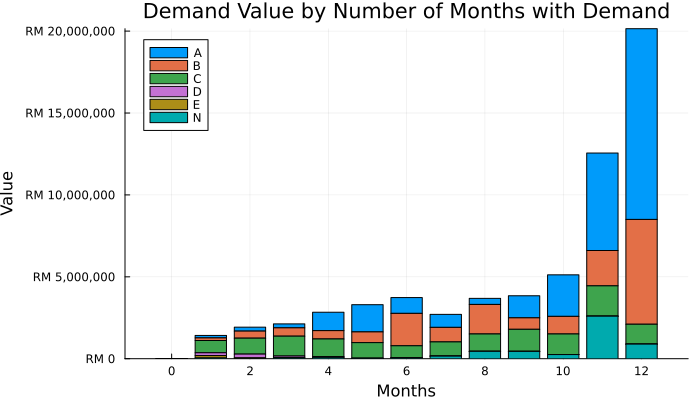

In [21]:
# Months by value of demand
d = combine(groupby(ditems, [:N_DEMAND, :ABC]), :DEMAND_VALUE => sum => :DEMAND_VALUE)
sort!(d, :N_DEMAND)
stackedbar(d, :N_DEMAND, :DEMAND_VALUE, :ABC, title="Demand Value by Number of Months with Demand", xlabel="Months", ylabel="Value", yformatter=money, size=(700, 400))

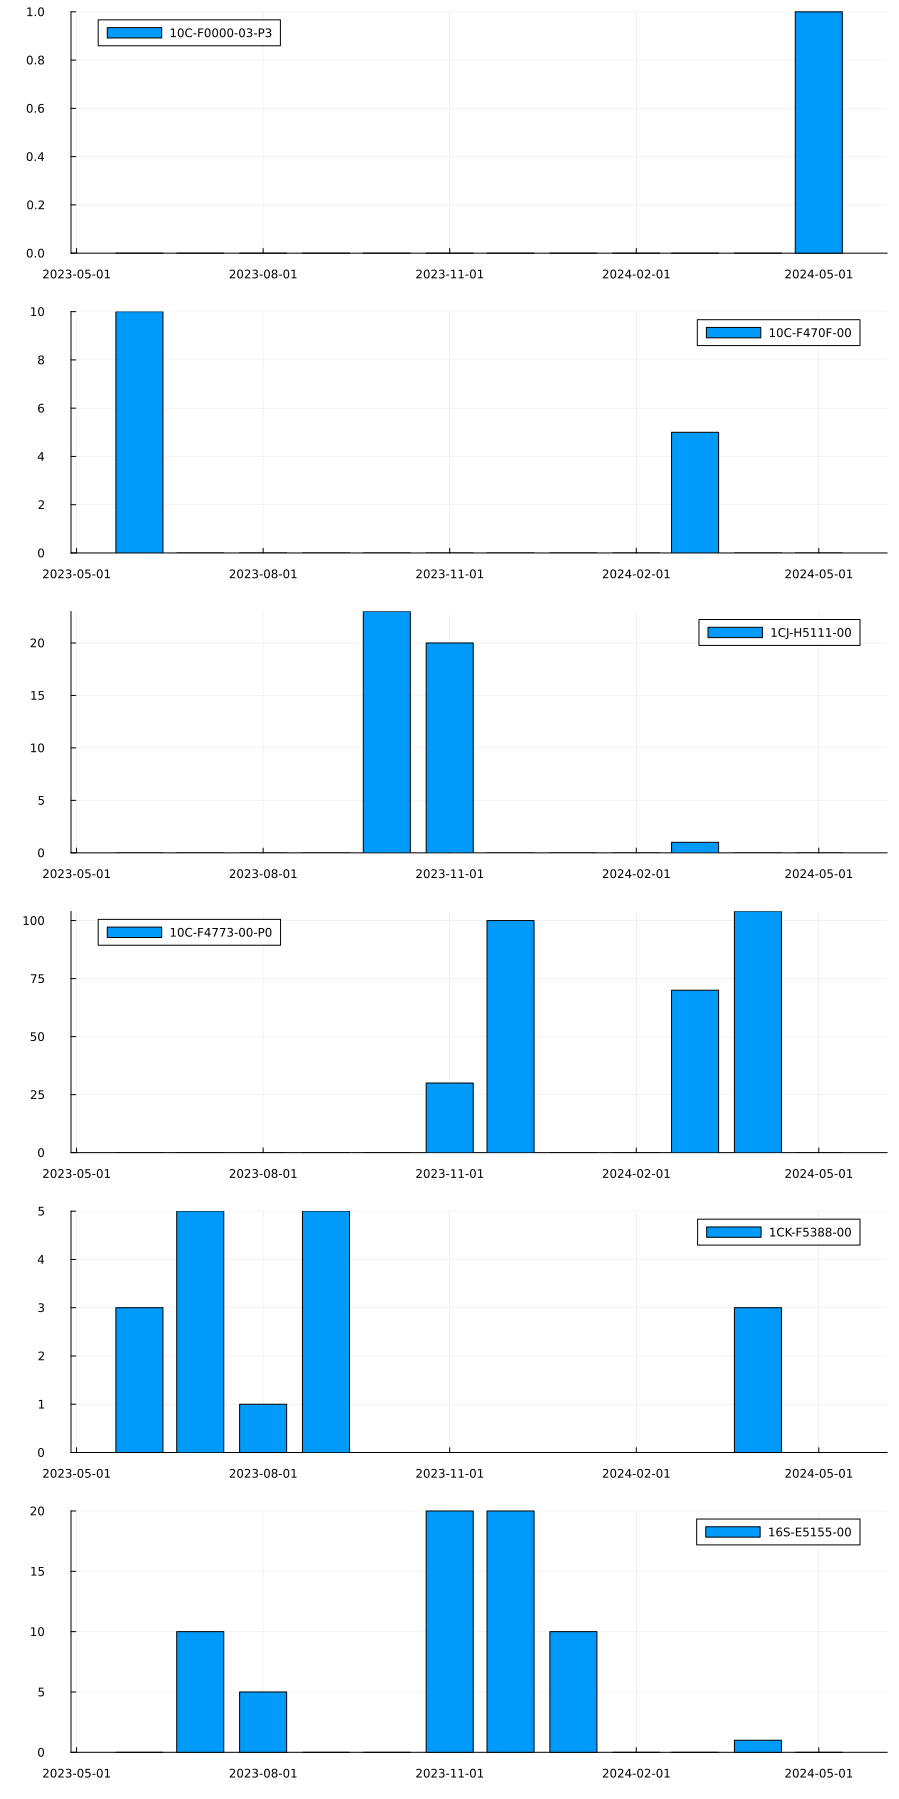

In [22]:
# plot items with 1 to 6 months of demand
sort!(ditems, :N_DEMAND)
d = combine(groupby(ditems, :N_DEMAND), :ITEM => first => :ITEM)
plot_demand(subset(demand, :MONTH => ByRow(>=(months[end-11]))), d[2:7, :ITEM], mm=false, trend=false)

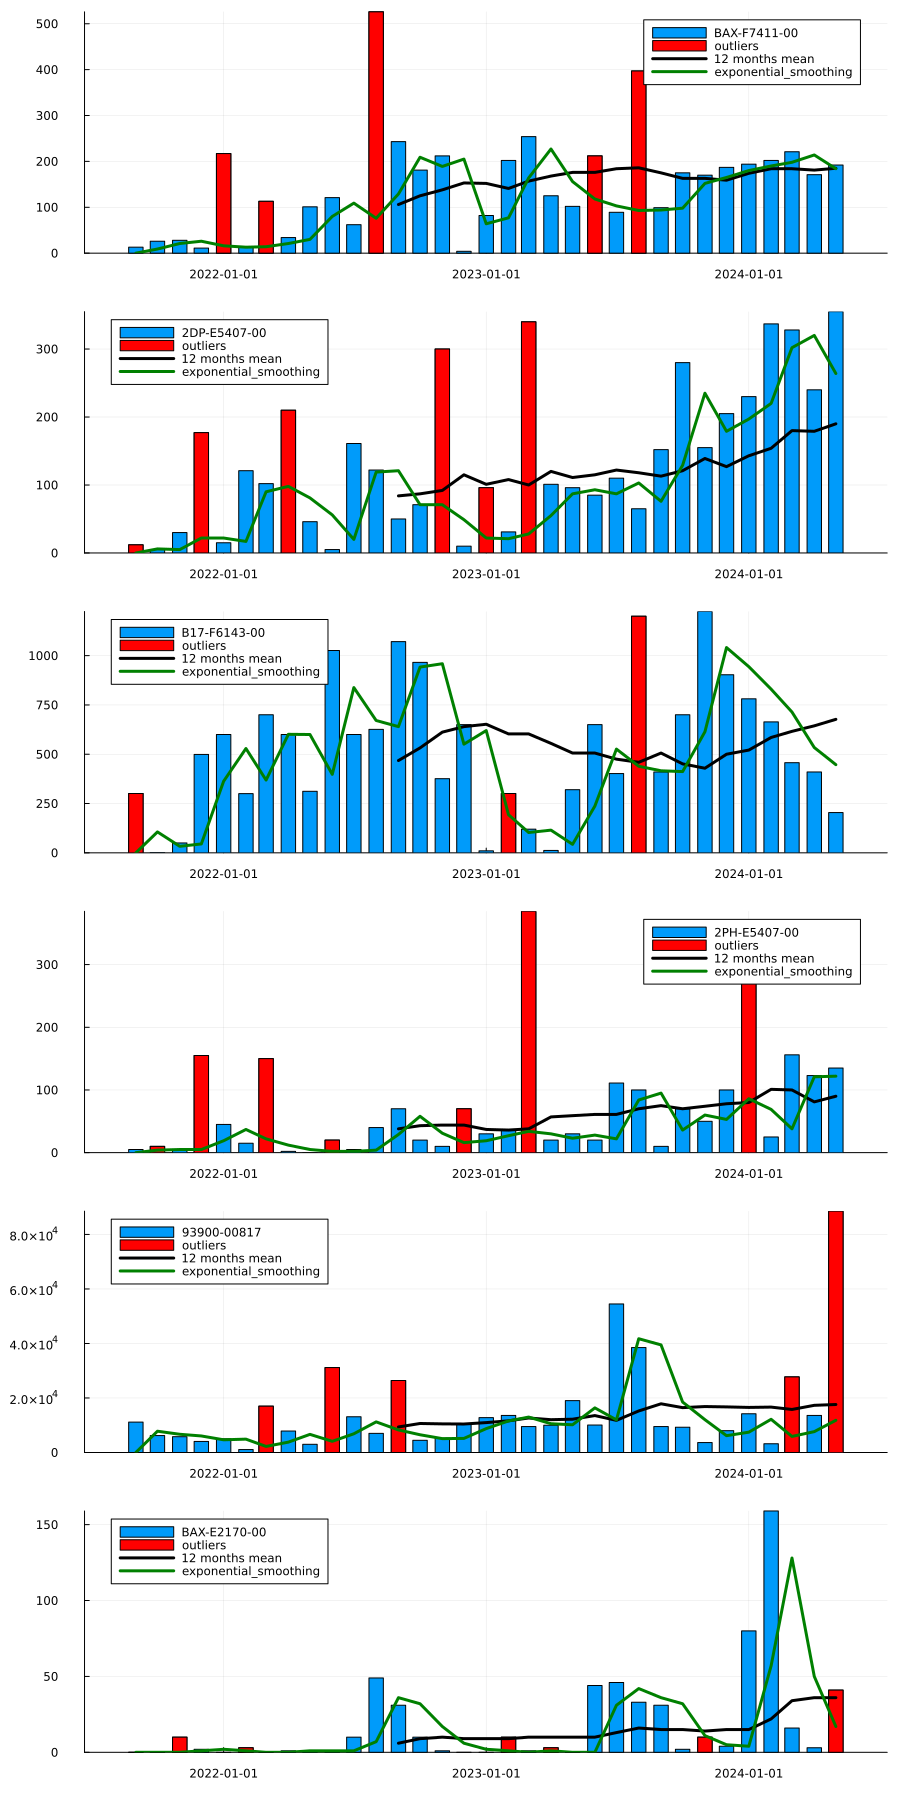

In [34]:
# plot fast movers
include("src/plot_data.jl")
include("src/forecast.jl")
sort!(ditems, [order(:N_DEMAND, rev=true), :CV])
# plot_demand(demand, ditems[1:40, :ITEM], trend=false)
it = ["BAX-F7411-00","2DP-E5407-00","B17-F6143-00","2PH-E5407-00","93900-00817","BAX-E2170-00"]
plot_demand(demand,it,of=exponential_smoothing,with_outliers=true)

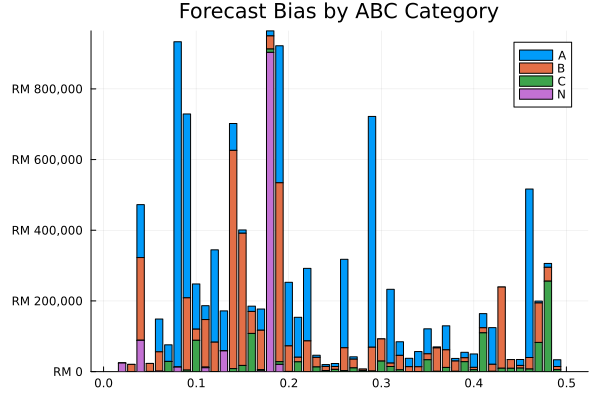

In [40]:
include("src/forecast.jl")
# Compute the forecast bias for item with demand in the last 12 months
dit12m = select(subset(ditems, :N_DEMAND => ByRow(>=(12))), :ITEM, :ABC)
dit12m = innerjoin(dit12m, select(demand, :ITEM, :MONTH, :DEMAND, :DEMAND_VALUE), on=:ITEM)
ditbias = combine(groupby(dit12m, [:ITEM, :ABC]), :DEMAND => (x -> forecast_bias(x,exponential_smoothing)) => :BIAS, :DEMAND => (x -> ma(x)[end]) => :DEMAND,:DEMAND_VALUE => sum => :DEMAND_VALUE)
select!(ditbias, All(),[:BIAS, :DEMAND]=>ByRow((b,d) -> round(b/d;digits=2)) => :BIAS_PERCENT)
d = combine(groupby(ditbias, :BIAS_PERCENT), :DEMAND_VALUE => sum => :DEMAND_VALUE)
sort!(subset!(d,:BIAS_PERCENT=>ByRow(x->x>-.5&&x<0.5)), :BIAS_PERCENT)
pretty(d, rename_cols=[:BIAS_PERCENT => "Bias %", :DEMAND_VALUE => "Value"])
stackedbar(subset(ditbias,:BIAS_PERCENT=>ByRow(x->x>-.5&&x<0.5)),:BIAS_PERCENT,:DEMAND_VALUE,:ABC, title="Forecast Bias by ABC Category",  yformatter=money, size=(600, 400))

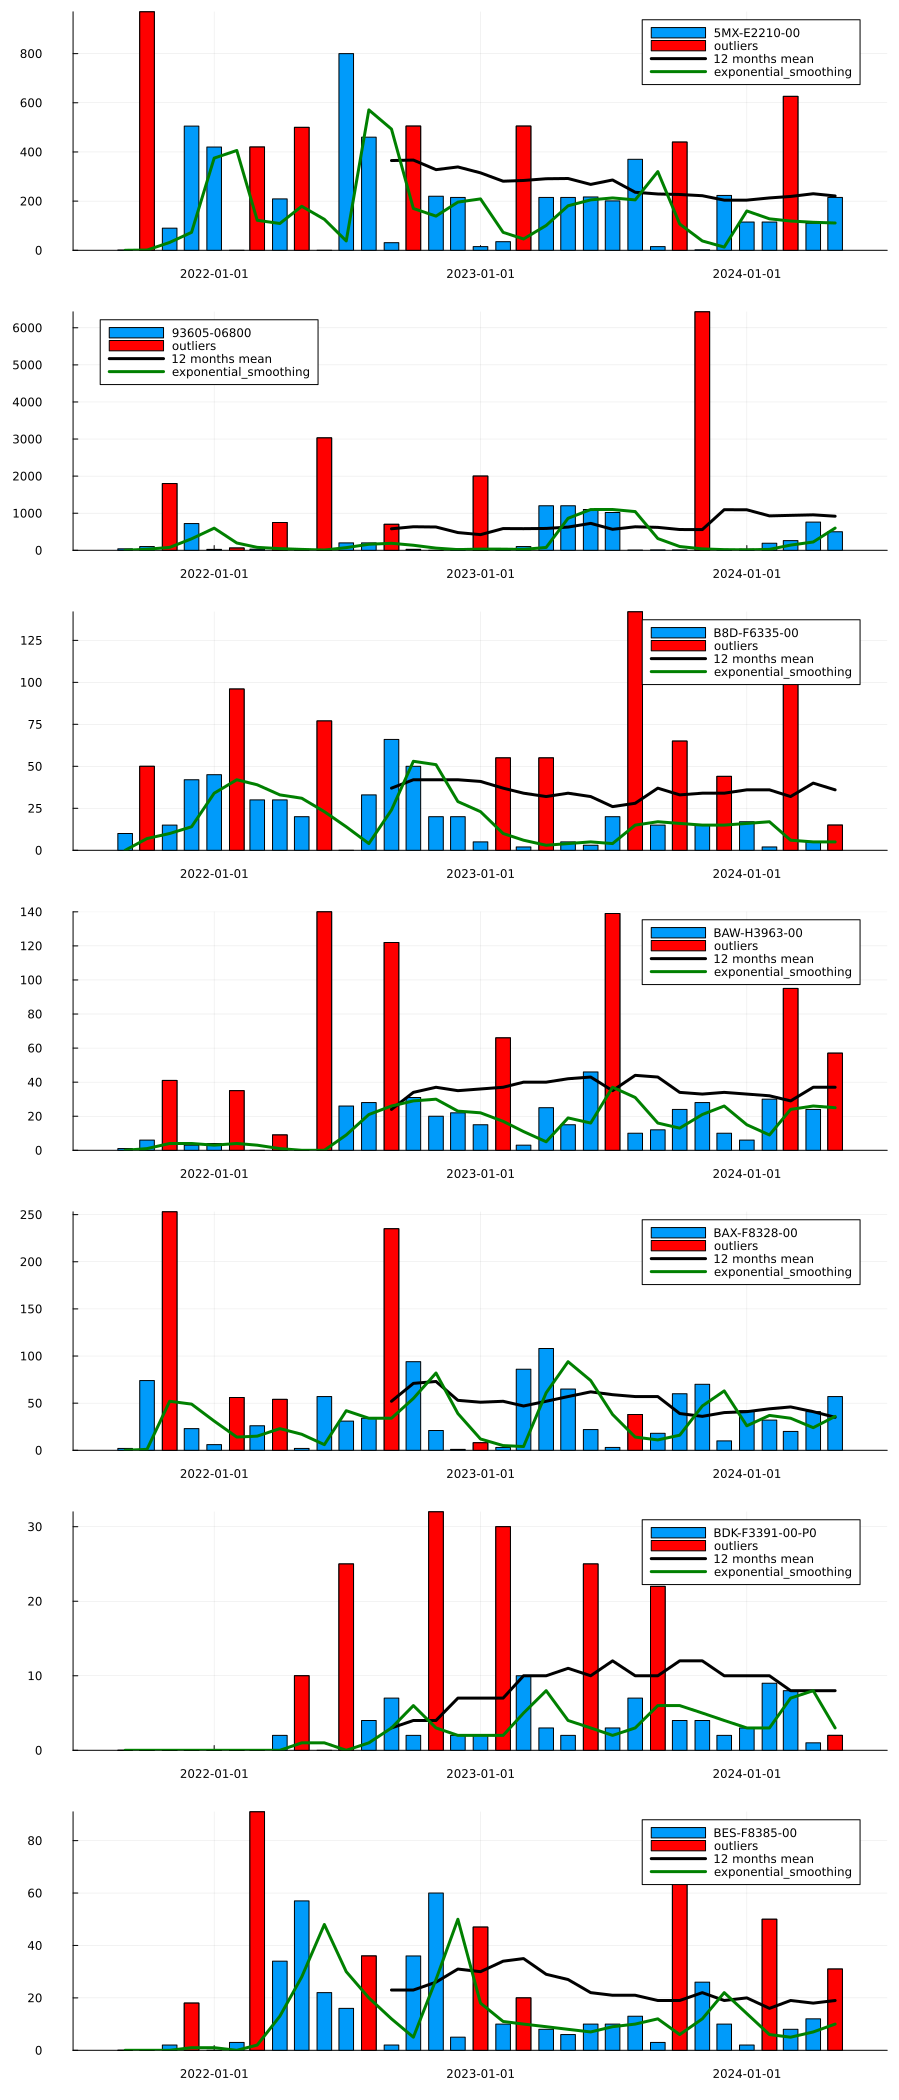

In [41]:
it = ditbias[ditbias[!,:BIAS_PERCENT] .== 0.49, :ITEM]
plot_demand(demand, it, trend=false,of=exponential_smoothing,with_outliers=true)

### TO DO
- [ ] Forecast Bias & Error
- [ ] Compare different forecasts


